# Comparison of Individual, Bagging and Boosting Algorithms

In [1]:
!pip install xgboost -q

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
# import the data
df = sns.load_dataset('diamonds')

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

In [6]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
y = le.fit_transform(y)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7109751575824991
Precision score:  0.7109751575824991
Recall score:  0.7109751575824991
F1 score:  0.7109751575824991
CPU times: total: 578 ms
Wall time: 676 ms


In [8]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7909714497589915
Precision score:  0.7909714497589915
Recall score:  0.7909714497589915
F1 score:  0.7909714497589915
CPU times: total: 9.61 s
Wall time: 9.76 s


In [9]:
%%time
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.8076566555431961
Precision score:  0.8076566555431961
Recall score:  0.8076566555431961
F1 score:  0.8076566555431961
CPU times: total: 13.4 s
Wall time: 2.4 s


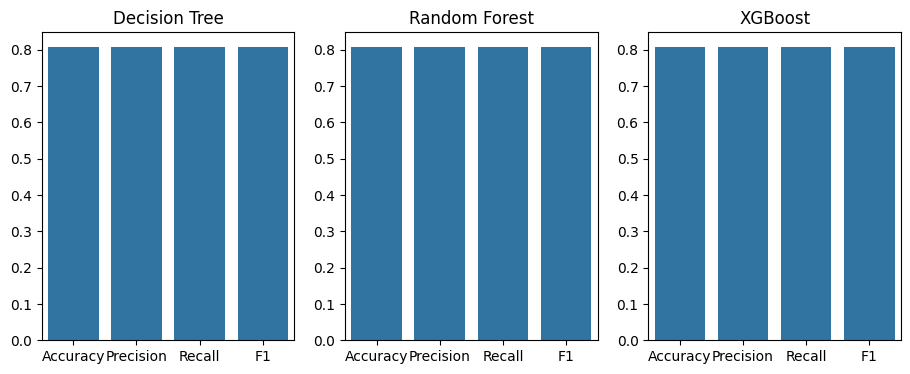

In [10]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()

# Trying same 3 algos on `TITANIC DATASET`

In [11]:
df1 = sns.load_dataset('titanic')
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# `"Filling N/A Values"`

In [22]:
#use warnings to remove warnings
import warnings
warnings.filterwarnings('ignore')

# remove missing values in age column using mean
df1['age'].fillna(df1['age'].mean(), inplace=True)

# drop the deck column
df1.drop('deck', axis=1, inplace=True)

# fill the missing values using ffill in embakced column
df1['embarked'].fillna(method='ffill', inplace=True)

# fill the missing values using bfill in embark_town
df1['embark_town'].fillna(method='Bfill', inplace=True)

df1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# `"Encoding X and y"`

In [23]:
# split the data into X and y
X = df1.drop(['alive', 'survived'], axis=1)
y = df1['survived']

# encode the varibles that are object or category using for loop
le = LabelEncoder()
for i in X.columns:
    if X[i].dtypes == 'object' or X[i].dtypes == 'category':
        X[i] = le.fit_transform(X[i])
    else:
        pass
# encode the y as well
y = le.fit_transform(y)

# split the data in train test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

X

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,3,1,22.000000,1,0,7.2500,2,2,1,True,2,False
1,1,0,38.000000,1,0,71.2833,0,0,2,False,0,False
2,3,0,26.000000,0,0,7.9250,2,2,2,False,2,True
3,1,0,35.000000,1,0,53.1000,2,0,2,False,2,False
4,3,1,35.000000,0,0,8.0500,2,2,1,True,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,1,1,True,2,True
887,1,0,19.000000,0,0,30.0000,2,0,2,False,2,True
888,3,0,29.699118,1,2,23.4500,2,2,2,False,2,False
889,1,1,26.000000,0,0,30.0000,0,0,1,True,0,True


# `"DecisionTree Classifier"`

In [14]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train1, y_train1)

# predict the test data
y_pred1 = dt.predict(X_test1)

print('Accuracy score: ', accuracy_score(y_test1, y_pred1))
print('Precision score: ', precision_score(y_test1, y_pred1, average='micro'))
print('Recall score: ', recall_score(y_test1, y_pred1, average='micro'))
print('F1 score: ', f1_score(y_test1, y_pred1, average='micro'))

Accuracy score:  0.7486033519553073
Precision score:  0.7486033519553073
Recall score:  0.7486033519553073
F1 score:  0.7486033519553073
CPU times: total: 15.6 ms
Wall time: 97.2 ms


# `"Random Forest"`

In [15]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train1, y_train1)

# predict the test data
y_pred1 = rf.predict(X_test1)

print('Accuracy score: ', accuracy_score(y_test1, y_pred1))
print('Precision score: ', precision_score(y_test1, y_pred1, average='micro'))
print('Recall score: ', recall_score(y_test1, y_pred1, average='micro'))
print('F1 score: ', f1_score(y_test1, y_pred1, average='micro'))

Accuracy score:  0.8156424581005587
Precision score:  0.8156424581005587
Recall score:  0.8156424581005587
F1 score:  0.8156424581005587
CPU times: total: 188 ms
Wall time: 190 ms


# `"xgboost algorithm"`

In [16]:
%%time

# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train1, y_train1)

# predict the test data
y_pred1 = xgb.predict(X_test1)

print('Accuracy score: ', accuracy_score(y_test1, y_pred1))
print('Precision score: ', precision_score(y_test1, y_pred1, average='micro'))
print('Recall score: ', recall_score(y_test1, y_pred1, average='micro'))
print('F1 score: ', f1_score(y_test1, y_pred1, average='micro'))

Accuracy score:  0.7877094972067039
Precision score:  0.7877094972067039
Recall score:  0.7877094972067039
F1 score:  0.7877094972067039
CPU times: total: 281 ms
Wall time: 66.2 ms


#  `"Plotting"`

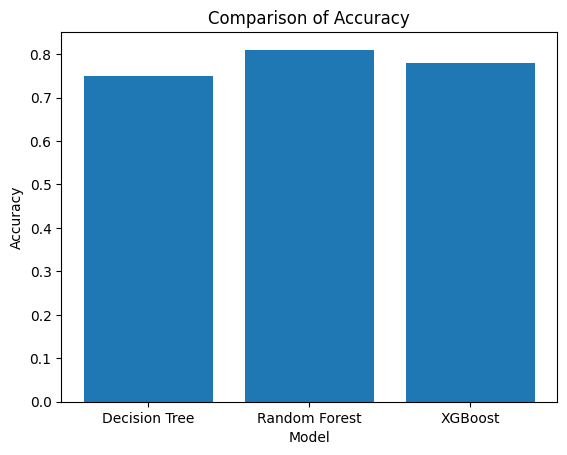

In [17]:
# make a bar plot showing each of the matrix with respect to the model accuracy

plt.bar(['Decision Tree', 'Random Forest', 'XGBoost'], [0.75, 0.81, 0.78])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy')
plt.show()

# `"Prediction"`

In [24]:
# now predit the output by giving input using decision tree algorithm

value = dt.predict([[2, 0, 22, 1, 1, 7.25, 2, 2, 1,True,0,False]]) # type: ignore
v = dt.predict([[2,1,22.000000,0,0,13.0000,2,1,1,True,2,True]]) # type: ignore
value,v

(array([0]), array([0]))

In [25]:
# now predict the output by giving input using random forest algorithm

value1 = rf.predict([[2, 0, 22, 1, 1, 7.25, 2, 2, 1,True,0,False]]) # type: ignore
v1 = rf.predict([[2,1,22.000000,0,0,13.0000,2,1,1,True,2,True]]) # type: ignore
value1,v1

(array([0]), array([0]))

In [26]:
# now predict the output by giving input using xgboost algorithm
# take this input and predict : (3,1,32.000000,0,0,7.7500,1,2,,1,True,1,True)

value2 = xgb.predict([[3, 1, 32.000000, 0, 0, 7.7500, 1, 2, 1, True, 1, True]]) # type: ignore
value2

array([0])